In [6]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.10.0


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!curl -O https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
!unzip -q kagglecatsanddogs_5340.zip
!ls
!ls PetImages
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)
image_size = (180, 180)
batch_size = 128

train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=2)
keras.utils.plot_model(model, show_shapes=True)



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  786M    0 1096k    0     0  2324k      0  0:05:46 --:--:--  0:05:46 2333k
  1  786M    1 8107k    0     0  5526k      0  0:02:25  0:00:01  0:02:24 5534k
  1  786M    1 15.2M    0     0  6340k      0  0:02:07  0:00:02  0:02:05 6345k
  2  786M    2 22.5M    0     0  6657k      0  0:02:01  0:00:03  0:01:58 6659k
  3  786M    3 30.9M    0     0  7083k      0  0:01:53  0:00:04  0:01:49 7086k
  4  786M    4 38.1M    0     0  7136k      0  0:01:52  0:00:05  0:01:47 7589k
  5  786M    5 45.3M    0     0  7189k      0  0:01:52  0:00:06  0:01:46 7675k
  6  786M    6 52.5M    0     0  7205k      0  0:01:51  0:00:07  0:01:44 7631k
  7  786M    7 58.6M    0     0  7096k      0  0:01:53  0:00:08  0:01:45 7401k
  8  786M    8 64.8M    0     0  7006k      0  0:01

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'PetImages\\Cat'

In [10]:
import numpy as np
x=np.array([1,2])
x.shape
y=np.expand_dims(x,axis=-1)
y


array([[1],
       [2]])

In [17]:
import cv2
print(cv2.__version__)

4.6.0


In [20]:
# Importing the OpenCV library
import cv2
# Reading the image using imread() function
image = cv2.imread('C:/Users/DELL/OneDrive/Desktop/image1.jpg')
  
# Extracting the height and width of an image
h, w = image.shape[:2]
# Displaying the height and width
print("Height = {},  Width = {}".format(h, w))

Height = 1040,  Width = 780


In [21]:
import numpy as np
x=np.array([1,2])
x.shape
y=np.expand_dims(x,axis=-1)
y

array([[1],
       [2]])

11490434/11490434 [==============================] - 5s 0us/step
Epoch 1/10
1875/1875 [==============================] - 80s 40ms/step - loss: 0.1475 - accuracy: 0.9546 - val_loss: 0.0580 - val_accuracy: 0.9813
Epoch 2/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0478 - accuracy: 0.9848 - val_loss: 0.0397 - val_accuracy: 0.9877
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0352 - accuracy: 0.9889 - val_loss: 0.0354 - val_accuracy: 0.9886
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0290 - val_accuracy: 0.9904
Epoch 5/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0347 - val_accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0169 - accuracy: 0.9943 - val_loss: 0.0320 - val_accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 59s

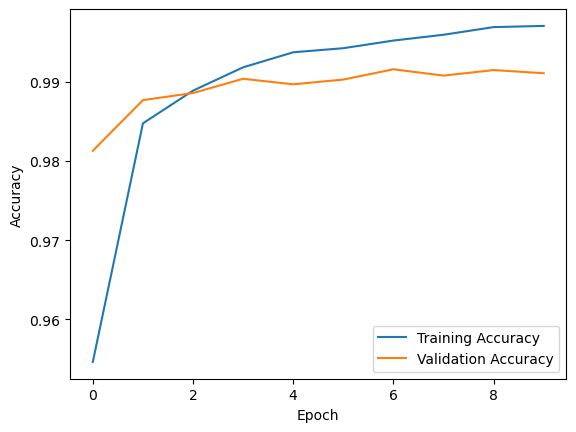

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension to the images (required for CNN input)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [1]:
# import the keras pakage
import tensorflow as tf

from tensorflow.keras.datasets import mnist
# import th eanother pakages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import utils
import numpy as np




# divide the  Data into (X_train ,Y_train,X_test,Y_test)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#reshape in form of (60000, 28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32')
#normalize to get data in range of 0-1
X_train/=255
X_test/=255
number_of_classes = 10
y_train = utils.to_categorical(y_train, number_of_classes)
y_test = utils.to_categorical(y_test, number_of_classes)



model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))
y_train.shape

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=200)

Epoch 1/5
300/300 [==============================] - 41s 120ms/step - loss: 0.4777 - accuracy: 0.8467 - val_loss: 0.0770 - val_accuracy: 0.9771
Epoch 2/5
300/300 [==============================] - 32s 106ms/step - loss: 0.1481 - accuracy: 0.9558 - val_loss: 0.0505 - val_accuracy: 0.9840
Epoch 3/5
300/300 [==============================] - 31s 102ms/step - loss: 0.1169 - accuracy: 0.9637 - val_loss: 0.0479 - val_accuracy: 0.9844
Epoch 4/5
300/300 [==============================] - 34s 114ms/step - loss: 0.0980 - accuracy: 0.9704 - val_loss: 0.0367 - val_accuracy: 0.9876
Epoch 5/5
300/300 [==============================] - 33s 110ms/step - loss: 0.0865 - accuracy: 0.9736 - val_loss: 0.0330 - val_accuracy: 0.9887


In [5]:
import  numpy as np
import cv2
# Load and preprocess the test image
img = cv2.imread('C:/Users/DELL/OneDrive/Desktop/number1.jpg', cv2.IMREAD_GRAYSCALE)
resized = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
img = np.resize(resized, (28, 28, 1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1, 28, 28, 1)

# Make predictions and get the digit output
y_pred = model.predict(im2arr)
digit = np.argmax(y_pred)

print("Predicted Digit:",digit)

1/1 [==============================] - 2s 2s/step
Predicted Digit: 4
